In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


## TV, Radio, Newspaper - features
## Sales - label

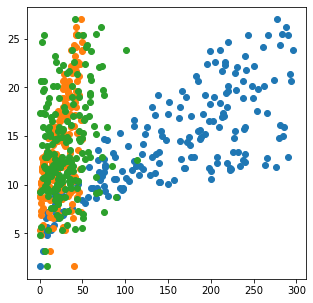

In [3]:
plt.figure(figsize=(5,5))
plt.scatter(x="TV",y="sales",data=df)
plt.scatter(x="radio",y="sales",data=df)
plt.scatter(x="newspaper",y="sales",data=df)

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

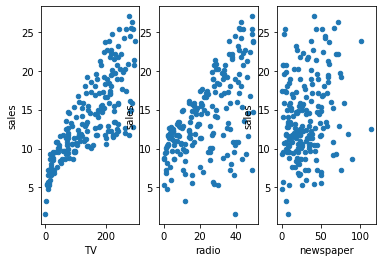

In [4]:
fig,axs = plt.subplots(1,3)
df.plot(kind="scatter",x="TV",y="sales",ax = axs[0])
df.plot(kind="scatter",x="radio",y="sales",ax = axs[1])
df.plot(kind="scatter",x="newspaper",y="sales",ax = axs[2])

In [5]:
X = df[["TV"]]
y = df["sales"]

from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X,y)

print(lm.intercept_)
print(lm.coef_)

7.0325935491276965
[0.04753664]


### Now we can predict the value for new data

In [6]:
actual = (7.0325935491276965) + 0.04753664*50
actual

9.409425549127697

In [7]:
0.04753664*1000

47.53664

In [8]:
x_new = [{"TV":50}]
x_n = pd.DataFrame(x_new)
x_n

,TV
0,50


In [9]:
lm.predict(x_n)

array([9.40942557])

## Multiple linear regression

In [10]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = df[feature_cols]
y = df.sales

lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

2.9388893694594085
[ 0.04576465  0.18853002 -0.00103749]


In [11]:
## Statistical model
## Ordinary least squares model
import statsmodels.formula.api as smf
lm = smf.ols(formula='sales ~ TV + radio + newspaper', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           1.58e-96
Time:                        23:11:33   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Statistical models will give only the overview of the model but cannot be built for prediction, for predicting only ML models can be used

## Now we can try by eliminating the features and look at the R^2 value, R2 will increase on increasing the features, which means model is getting overfit, so only adj.R2 is taken

In [12]:
lm = smf.ols(formula="sales~ TV+radio",data=df).fit()
print(lm.rsquared)
lm.rsquared_adj

0.8971942610828957


0.8961505479974429

In [13]:
lm = smf.ols(formula="sales~ TV+radio+newspaper",data=df).fit()
print(lm.rsquared)
lm.rsquared_adj

0.8972106381789522


0.8956373316204668

In [14]:
lm = smf.ols(formula="sales~ TV+newspaper",data=df).fit()
print(lm.rsquared)
lm.rsquared_adj

0.6458354938293271


0.6422399150864777

## For multiple features in data, better approach is to go for Adjusted R2

# Handling categorical features

In [15]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(df))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
df['Scale'] = 'small'
df.loc[mask_large, 'Scale'] = 'large'
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale
0,1,230.1,37.8,69.2,22.1,large
1,2,44.5,39.3,45.1,10.4,small
2,3,17.2,45.9,69.3,9.3,small
3,4,151.5,41.3,58.5,18.5,small
4,5,180.8,10.8,58.4,12.9,large


In [16]:
df["IsLarge"] = df["Scale"].map({"small":0,"large":1})
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge
0,1,230.1,37.8,69.2,22.1,large,1
1,2,44.5,39.3,45.1,10.4,small,0
2,3,17.2,45.9,69.3,9.3,small,0
3,4,151.5,41.3,58.5,18.5,small,0
4,5,180.8,10.8,58.4,12.9,large,1


In [17]:
np.random.seed(12345)

nums = np.random.rand(len(df))

mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = (nums > 0.66)

df["Targetedgeo"] = "rural"
df.loc[mask_suburban,"Targetedgeo"] = "Sub_urban"
df.loc[mask_urban,"Targetedgeo"] = "urban"

df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targetedgeo
0,1,230.1,37.8,69.2,22.1,large,1,urban
1,2,44.5,39.3,45.1,10.4,small,0,rural
2,3,17.2,45.9,69.3,9.3,small,0,rural
3,4,151.5,41.3,58.5,18.5,small,0,rural
4,5,180.8,10.8,58.4,12.9,large,1,Sub_urban


In [18]:
area_dummies = pd.get_dummies(df["Targetedgeo"],drop_first=True)

df = pd.concat([df,area_dummies],axis=1)
df.head()

,Unnamed: 0,TV,radio,newspaper,sales,Scale,IsLarge,Targetedgeo,rural,urban
0,1,230.1,37.8,69.2,22.1,large,1,urban,0,1
1,2,44.5,39.3,45.1,10.4,small,0,rural,1,0
2,3,17.2,45.9,69.3,9.3,small,0,rural,1,0
3,4,151.5,41.3,58.5,18.5,small,0,rural,1,0
4,5,180.8,10.8,58.4,12.9,large,1,Sub_urban,0,0


In [19]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales', 'Scale', 'IsLarge',
       'Targetedgeo', 'rural', 'urban'],
      dtype='object')

In [20]:
X = df[['TV', 'radio', 'newspaper','IsLarge','rural', 'urban']]
y = df["sales"]

lm = LinearRegression()
lm.fit(X,y)

print(lm.coef_)

[ 0.0456175   0.18909888 -0.00164417  0.27237198  0.52161688  0.18863007]


## Lets see Multi collinearity

## Multi collinearity means there will be relation between X data itself( b/w the features itself)
## No need to drop everytime when we face multi collinearity, it depends

### 1. Merge the features
### 2. Do Nothing

## VIF Should not be greater than 10, so we can say its not multi collinear - VIF will say about multi collinearity

## Now see for Another data set for ridge, lasso and elastic net

In [21]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [22]:
data =pd.read_csv('Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [23]:
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,485.000000,490.000000,485.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.558763,107.187755,3.121649,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.274704,6.112899,1.146160,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [24]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [25]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())
data['GRE Score']  = data['GRE Score'].fillna(data['GRE Score'].mean())

In [26]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [27]:
data= data.drop(columns = ['Serial No.'])
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

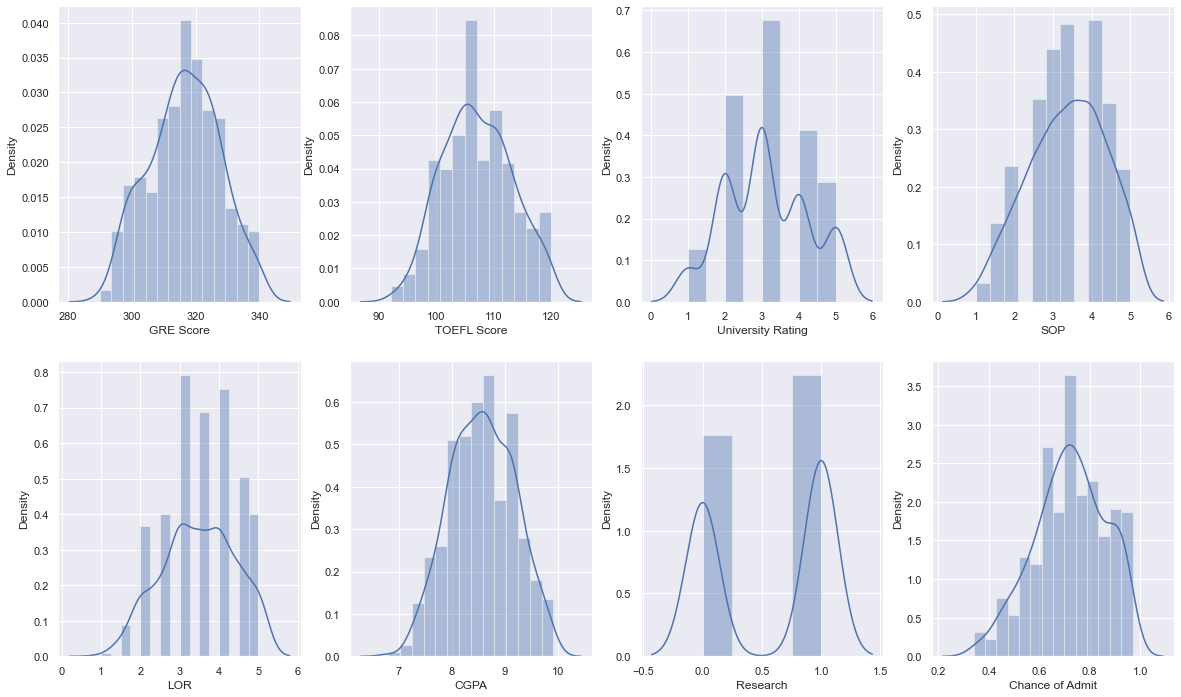

In [28]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in data:
    if plotnumber <= len(data):
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column],kde=True)
    plotnumber +=1

In [29]:
y = data['Chance of Admit']
X =data.drop(columns = ['Chance of Admit'])

## Data follows almost Normal distrubution, so directly validating with Output (label column )

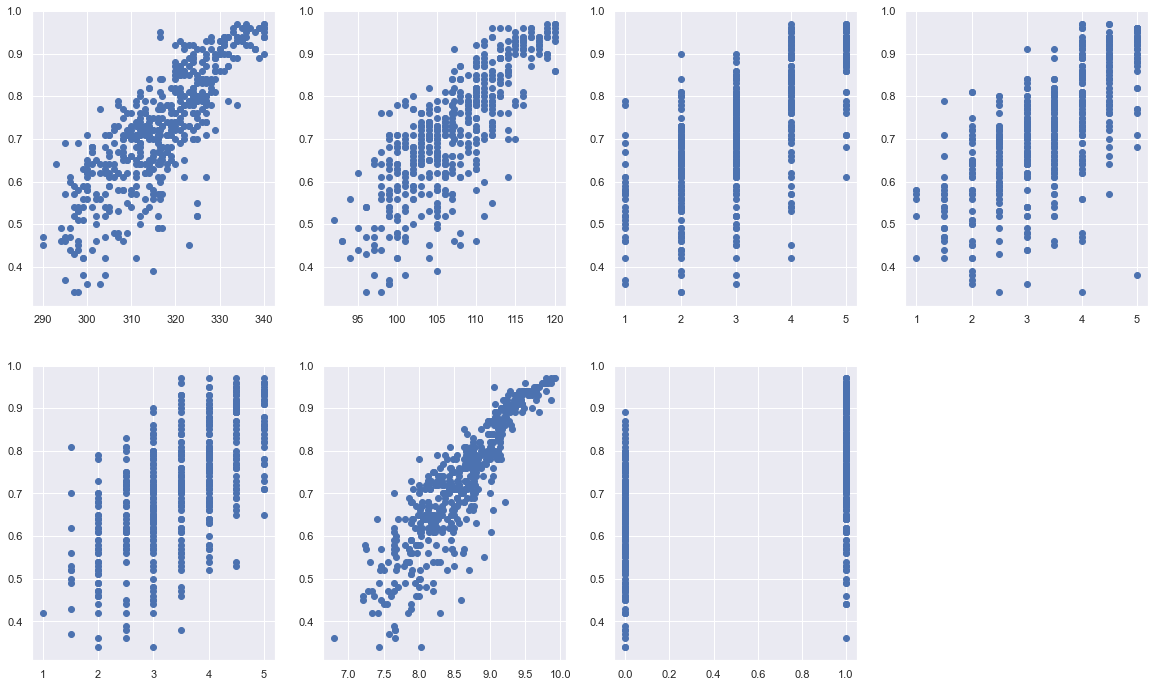

In [30]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in X:
    if plotnumber <= len(data):
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(X[column],y)
    plotnumber +=1

## Fit transform for converting into lower scales and also converting into z scale, we use standard scaler and fir transform

In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables,i) for i in range((variables.shape[1]))]
    
vif["Features"] = X.columns
vif

,VIF,Features
0,4.152735,GRE Score
1,3.793345,TOEFL Score
2,2.517272,University Rating
3,2.776393,SOP
4,2.037449,LOR
5,4.654369,CGPA
6,1.459411,Research


In [33]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [34]:
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression()

In [35]:
regression.predict(scaler.transform([[337,118,4,4.5,4.5,9.65,1]]))

array([0.95655226])

In [36]:
## In ML models we dont have standard fun for adj_r2

def adjr2(x,y):
    r2 = regression.score(x,y) ## will give R2 value
    n = x.shape[0] ## no.of samples(row data)
    p = x.shape[1] ## no.of parameters considered
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [37]:
print(regression.score(x_train,y_train))
adjr2(x_train,y_train)

0.8415250484247909


0.8385023654247188

In [38]:
print(regression.score(x_test,y_test))
adjr2(x_test,y_test) ## Adjusted R2 value is less than our train data

0.7534898831471066


0.7387414146174464

## Saving file into local system
## predicting(testing) using the saved model

In [39]:
import pickle
filename = ("finalmodel.pickle")
pickle.dump(regression,open(filename, "wb"))

In [40]:
loaded_model = pickle.load(open(filename, "rb"))
a=loaded_model.predict(scaler.transform([[300,110,5,5,5,10,1]]))
a
## scalar transform is used as we have converted into fit transorm 
##while training the data and built the model

array([0.92190162])

## Now implementing Ridge and Lasso Regression to substantiate the overfitting for test data scores

In [43]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=100000,normalize = True)
lasscv.fit(x_train,y_train)
## LassoCV will return best alpha and coefficients after performing 10 cross validations

LassoCV(cv=10, max_iter=100000, normalize=True)

In [44]:
alpha = lasscv.alpha_
alpha

3.0341655445178153e-05

In [ ]:
lasso_reg = Lasso(alpha) ## prev steps only for best alpha parameter 
lasso_reg.fit(x_train, y_train)

In [ ]:
lasso_reg.score(x_test, y_test)

## As lasso regression is also projecting same R2 score as before our model didnt overfit the data

## Else we would have kept LASSO regressor data into the pickle file

In [ ]:
alphas = np.random.uniform(low=0, high=10, size=(50,))
ridcv = RidgeCV(alphas=alphas,cv=10, normalize=True)
ridcv.fit(x_train, y_train)

In [ ]:
ridcv.alpha_

In [ ]:
ridgereg = Ridge(alpha=ridcv.alpha_)
ridgereg.fit(x_train, y_train)

In [ ]:
ridgereg.score(x_test, y_test)